In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

from scipy import stats 
from sklearn.preprocessing import scale 
import statsmodels.api as sm 

In [2]:
df_store = pd.read_csv('python/hypothesis testing/02/demos/datasets/E-commerce.csv', index_col = 'Unnamed: 0')

In [3]:
df_store.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,4,1,0,Initmates,Intimate,Intimates
1,1080,34,5,1,4,General,Dresses,Dresses
2,1077,60,3,0,0,General,Dresses,Dresses
3,1049,50,5,1,0,General Petite,Bottoms,Pants
4,847,47,5,1,6,General,Tops,Blouses


In [4]:
df_store.shape

(23472, 8)

<H4> The rows corresponds to women clothing products listed on an e-commerce site </h4>

<H3> NB: The two columns we are interested in here are: 'Rating' and 'Recommended IND' </h3>
<H4> Recommended IND tell us if the ecommerce site recommends that product or not </h4>
<h4> Rating signifies rating </h4>

<h2> Aim of the experiment: To see if the distribution of ratings for '0' recommendation is similar to or Different from ratings for '1' recommendations made by the ecommerce site </h2>

<H2>
VERY IMPORTANT: While the chi2 test seeks to find if the ‘observed and expected values’ of a similar category are the same, WHILE the fisher exact test seeks to find out if the distribution of two different samples (categories) are the same WHILE the chi2_contingency test seeks to find out if the distribution of two or  m0ore different samples (or categories) are the same. 
    </h2>

<h3> We start by segregating the columns that we need </h3>

In [5]:
df_data = df_store[['Rating', 'Recommended IND']]

In [6]:
#check result 
df_data.head()

,Rating,Recommended IND
0,4,1
1,5,1
2,3,0
3,5,1
4,5,1


<H4> NB: Since the key here is to know if the ratings for 'recommended products' is same as the distribution for ratings of 'non-recommended products', 
    we plot the distribution of rating to see how it is </h4>

In [11]:
df_good = df_data[df_data['Recommended IND'] == 1]
df_bad = df_data[df_data['Recommended IND'] == 0]

<h3> Below is the plot of the distribution of the "observed" values </h3>

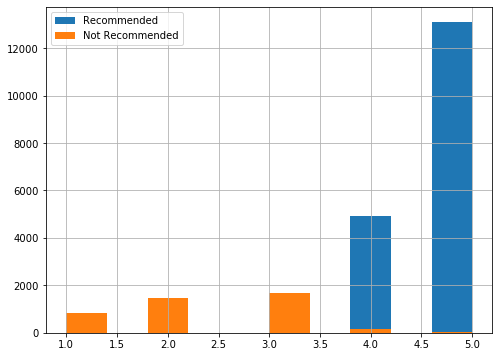

In [15]:
df_good['Rating'].hist(figsize = (8, 6), label = 'Recommended')
df_bad['Rating'].hist(figsize = (8, 6), label = 'Not Recommended')

plt.legend();

In [16]:
#NB: from the above, the distribution of good ratings and bad rating are not similar 

<h4>From the above, majority of the products have good rating </h4>

<h3>VERY IMPORTANT : You must build a cross tabulation when working with Two Or More samples (or category)</h3>

In [17]:
#we can view the data in a tabular format 
crosstab = pd.crosstab(df_data['Recommended IND'], df_data['Rating'])
crosstab

Rating,1,2,3,4,5
Recommended IND,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13092


In [18]:
crosstab.values

array([[  826,  1471,  1682,   168,    25],
       [   16,    94,  1189,  4909, 13092]], dtype=int64)

<h4>Apply chi2_contingency test to the crosstab: In this case, I will use the Chi2_contingency test </h4>

<H3> VERY IMPORTANT: Given that it is two categories, we can either apply the Fisher exact test </h3>

In [24]:
test_statistic, p_value, Degree_of_freedom, expected_distribution = stats.chi2_contingency(crosstab)

In [25]:
'The Chi2 Statistic is {}'.format(test_statistic)

'The Chi2 Statistic is 16711.664238744874'

<H4> The above test statistic above is very high </h4>

In [26]:
print('The P-value is {}'.format(p_value))

The P-value is 0.0


<H4> From the above, the distribution between the expected and observed values are not similar. This means that the distribution of data for the recommended products and the non-recommended products are statistically not similar</h4>

In [27]:
print('The degree of freedom is {}'.format(Degree_of_freedom))

The degree of freedom is 4


In [30]:
expected_distribution[0]
expected_distribution[1]

array([  692.33980913,  1286.83111793,  2360.69785276,  4174.59526244,
       10785.53595774])

In [33]:
df_result = pd.DataFrame({
    '0': expected_distribution[0],
    '1': expected_distribution[1]
})

In [35]:
df_result.head(10)

,0,1
0,149.660191,692.339809
1,278.168882,1286.831118
2,510.302147,2360.697853
3,902.404738,4174.595262
4,2331.464042,10785.535958


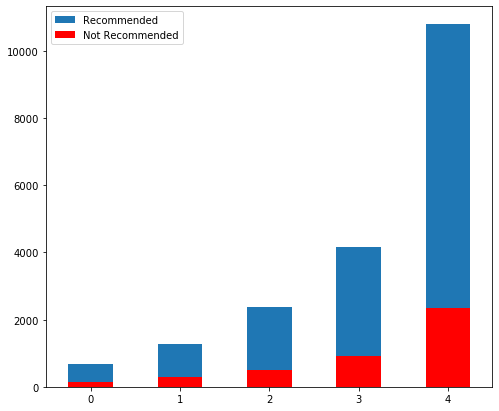

In [55]:
fig, ax = plt.subplots(figsize = (8, 7))
df_result['1'].plot(kind = 'bar', label = 'Recommended')
df_result['0'].plot(kind = 'bar', color = 'red', label = 'Not Recommended')
plt.xticks(rotation = 0);
plt.legend();

<h3> below, we are going to replot the observed distribution to see if there are any differences </h3>

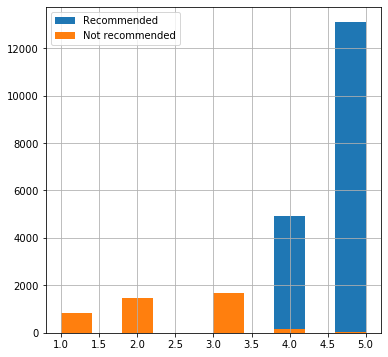

In [45]:
#plot both distribution above using a histogram 

fig, ax = plt.subplots(figsize = (6, 10))
df_good['Rating'].hist(figsize = (8, 6), label = 'Recommended');
df_bad['Rating'].hist(figsize = (6, 6), label = 'Not recommended');

plt.legend();


<H1> Clearly, the Chi2 distribution got it correct as the histogram for the expected and observed distribution are not the same </h1> 